Next word Prediction 



*   List item
*   List item


*   List item




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing Modules

import pandas as pd
import numpy as np   


In [ ]:
# read dataset
df = pd.read_csv('/content/gdrive/MyDrive/Emerging/dataset.csv')
df.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [ ]:
# rows & columns
df.shape

(12401, 2)

In [ ]:
df.isnull().sum()

Text        0
language    1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Text        0
language    0
dtype: int64

In [ ]:
# rows & columns
df.shape

(12400, 2)

In [ ]:
# number of rows for each language
df['language'].value_counts()

Russian       574
Swedish       573
Pushto        572
French        571
Chinese       571
Urdu          570
Indonesian    566
Tamil         566
Portugese     565
Dutch         565
Persian       565
Latin         564
Japanese      564
Turkish       561
Romanian      561
Korean        559
Thai          559
English       557
Arabic        557
Spanish       556
Hindi         554
Estonian      550
Name: language, dtype: int64

In [ ]:
# selecting languages
language_list = ['English', 'French', 'Dutch']

# temporary dataframe with languages filtered from language_list
df_temp = df[df['language'].isin(language_list)]

# creates new clean Dataframe
df = pd.DataFrame(columns=['Text', 'language'])

# selects 50 rows of each language, adds them into clean dataframe
for l in language_list:
    lang_trim = df_temp[df_temp['language'] == l].sample(75, random_state=34)
    df = df.append(lang_trim)

In [ ]:
df.shape

(225, 2)

In [ ]:
df.head()

,Text,language
4163,page and brin used the formers basic html prog...,English
1399,her memoir titled every secret thing was publi...,English
3219,from to johnson openly sympathized with the ...,English
4600,the medlycott baronetcy of ven house in the co...,English
6879,in december the news review in partnership w...,English


In [ ]:
# new number of rows for each language
df['language'].value_counts()

English    75
French     75
Dutch      75
Name: language, dtype: int64

In [ ]:
# filtering languages
df_lang = df.loc[((df['language'] == 'Dutch') | 
                  (df['language'] == 'English') | 
                  (df['language'] == 'French'))]


clas_text = df_lang['Text']         # dependent
lang      = df_lang['language']     # independent


print(lang)
print()
print(len(lang))
print()
print(lang.value_counts())
print(lang.shape)

4163     English
1399     English
3219     English
4600     English
6879     English
          ...   
4814       Dutch
1369       Dutch
7334       Dutch
6183       Dutch
11453      Dutch
Name: language, Length: 225, dtype: object

225

English    75
French     75
Dutch      75
Name: language, dtype: int64
(225,)


In [ ]:
df_lang.head()

,Text,language
4163,page and brin used the formers basic html prog...,English
1399,her memoir titled every secret thing was publi...,English
3219,from to johnson openly sympathized with the ...,English
4600,the medlycott baronetcy of ven house in the co...,English
6879,in december the news review in partnership w...,English


In [ ]:
clas_text.describe()

count                                                   225
unique                                                  225
top       page and brin used the formers basic html prog...
freq                                                      1
Name: Text, dtype: object

In [ ]:
clas_text.head()

4163    page and brin used the formers basic html prog...
1399    her memoir titled every secret thing was publi...
3219    from  to  johnson openly sympathized with the ...
4600    the medlycott baronetcy of ven house in the co...
6879    in december  the news  review in partnership w...
Name: Text, dtype: object

In [ ]:
print('Language column')
print(lang.head())
print()
print(lang.shape)

Language column
4163    English
1399    English
3219    English
4600    English
6879    English
Name: language, dtype: object

(225,)


In [ ]:
temp = df.groupby('language').agg({'Text': lambda x: list(x)})
temp.reset_index(inplace=True)
temp

,language,Text
0,Dutch,[de verdediging van de stad werd geleid door d...
1,English,[page and brin used the formers basic html pro...
2,French,[dautres auteurs se sont inspirés de ce villag...


In [ ]:
# selecting language values
dutch_temp = temp[temp['language'] == 'Dutch'].values.tolist()
english_temp = temp[temp['language'] == 'English'].values.tolist()
french_temp = temp[temp['language'] == 'French'].values.tolist()

In [ ]:
print(dutch_temp)

[['Dutch', ['de verdediging van de stad werd geleid door de latijnse aartsbisschop hugo ii de armeense bisschop johannes en de jacobbiden bisschop basil als jocelin ii te horen krijgt over de belegering van zijn stad voert hij zijn leger naar turbessel wetend dat hij zengi nooit kan verslaan zonder de hulp van de andere kruisvaardersstaten vanuit jeruzalem werd gereageerd door melisende die een leger stuurde onder leiding van manasses van hierges filips van milly en elinand van bures raymond van antiochië kon de roep om hulp niet inwilligen omdat hij zelf met de byzantijnen een conflict moest uitvechten in armeens sicilië', 'archibracon fenestralis is een insect dat behoort tot de orde vliesvleugeligen hymenoptera en de familie van de schildwespen braconidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd door szepligeti in ', 'chelonus angustatus is een insect dat behoort tot de orde vliesvleugeligen hymenoptera en de familie van de schildwespen braconid

In [ ]:
del dutch_temp[0][0]
del english_temp[0][0]
del french_temp[0][0]

In [ ]:
print(dutch_temp)

[[['de verdediging van de stad werd geleid door de latijnse aartsbisschop hugo ii de armeense bisschop johannes en de jacobbiden bisschop basil als jocelin ii te horen krijgt over de belegering van zijn stad voert hij zijn leger naar turbessel wetend dat hij zengi nooit kan verslaan zonder de hulp van de andere kruisvaardersstaten vanuit jeruzalem werd gereageerd door melisende die een leger stuurde onder leiding van manasses van hierges filips van milly en elinand van bures raymond van antiochië kon de roep om hulp niet inwilligen omdat hij zelf met de byzantijnen een conflict moest uitvechten in armeens sicilië', 'archibracon fenestralis is een insect dat behoort tot de orde vliesvleugeligen hymenoptera en de familie van de schildwespen braconidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd door szepligeti in ', 'chelonus angustatus is een insect dat behoort tot de orde vliesvleugeligen hymenoptera en de familie van de schildwespen braconidae de wet

In [ ]:
# list of languages paragraph
all_lang = [dutch_temp, english_temp, french_temp]
temp = []

for thirdD in all_lang:

        for lst in thirdD:

            for paragraph in lst:

                # add paragraph to list
                temp.append(paragraph)


dutch_temp = temp[0]
english_temp = temp[1]
french_temp = temp[2]

dutch = [''.join(dutch_temp)]
english = [''.join(english_temp)]
french = [''.join(french_temp)]

In [ ]:
# list of languages paragraph
pred_text = [dutch, english, french]


print()
print('pred_text')
print(pred_text)
print()


pred_text
[['de verdediging van de stad werd geleid door de latijnse aartsbisschop hugo ii de armeense bisschop johannes en de jacobbiden bisschop basil als jocelin ii te horen krijgt over de belegering van zijn stad voert hij zijn leger naar turbessel wetend dat hij zengi nooit kan verslaan zonder de hulp van de andere kruisvaardersstaten vanuit jeruzalem werd gereageerd door melisende die een leger stuurde onder leiding van manasses van hierges filips van milly en elinand van bures raymond van antiochië kon de roep om hulp niet inwilligen omdat hij zelf met de byzantijnen een conflict moest uitvechten in armeens siciliëarchibracon fenestralis is een insect dat behoort tot de orde vliesvleugeligen hymenoptera en de familie van de schildwespen braconidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd door szepligeti in chelonus angustatus is een insect dat behoort tot de orde vliesvleugeligen hymenoptera en de familie van de schildwespen braconidae de w

In [ ]:


# def clean_text(word):

#     # removes symbols, punctuation and numbers
#     word = re.sub(r'[!#@$-(),."%*^:;~?`0-9]', '', word) 
#     word = re.sub(r'[[]]', ' ', word)  
#     word = word.lower()

#     return word


import string

def clean_text(word):

    clean_word = word.translate(str.maketrans('', '', string.punctuation))

    return clean_word



import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

tokens = []   # tokenised words

for language in pred_text:
    
    for word in language:

        clean_text(word)

        # divides paragraph into substrings 
        tokens.append(word_tokenize(word))




print('\ntext')
print(pred_text)
print(len(pred_text))

print('\ntokens')
print(tokens)
print(len(tokens))
print('')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.



text
[['de verdediging van de stad werd geleid door de latijnse aartsbisschop hugo ii de armeense bisschop johannes en de jacobbiden bisschop basil als jocelin ii te horen krijgt over de belegering van zijn stad voert hij zijn leger naar turbessel wetend dat hij zengi nooit kan verslaan zonder de hulp van de andere kruisvaardersstaten vanuit jeruzalem werd gereageerd door melisende die een leger stuurde onder leiding van manasses van hierges filips van milly en elinand van bures raymond van antiochië kon de roep om hulp niet inwilligen omdat hij zelf met de byzantijnen een conflict moest uitvechten in armeens siciliëarchibracon fenestralis is een insect dat behoort tot de orde vliesvleugeligen hymenoptera en de familie van de schildwespen braconidae de wetenschappelijke naam van de soort werd voor het eerst geldig gepubliceerd door szepligeti in chelonus angustatus is een insect dat behoort tot de orde vliesvleugeligen hymenoptera en de familie van de schildwespen braconidae de wetens

In [ ]:
classify = []   # classifying languages array

for word in clas_text:

    clean_text(word)

    # adds clean word to classify list
    classify.append(word)



print('\nclassify')
print(classify)
print('Total paragraphs:', len(classify))
print()



classify
['page and brin used the formers basic html programming skills to set up a simple search page for users as they did not have a web page developer to create anything visually elaborate they also began using any computer part they could find to assemble the necessary computing power to handle searches by multiple users as their search engine grew in popularity among stanford users it required additional servers to process the queries in august  the initial version of google still on the stanford university website was made available to internet users', 'her memoir titled every secret thing was published in  in contradiction of assertions that she had been given immunity on the crocker robbery the book caused authorities to consider bringing a new prosecution against her in a  interview for an nbc program on the case she described the prosecutors suggestions that she had been in a consensual relationship with wolfe as an insult to rape victims and "outrageous"', 'from  to  johns

In [ ]:
# selects list language
dutch_token = tokens[0]
english_token = tokens[1]
french_token = tokens[2]


dutch_total = len(dutch_token)
english_total = len(english_token)
french_total = len(french_token)
total_words = dutch_total + english_total + french_total

print('Dutch')
print(dutch_token)
print('Total:', dutch_total)

print('\nEnglish')
print(english_token)
print('Total:', english_total)

print('\nFrench')
print(french_token)
print('Total:', french_total)

Dutch
['de', 'verdediging', 'van', 'de', 'stad', 'werd', 'geleid', 'door', 'de', 'latijnse', 'aartsbisschop', 'hugo', 'ii', 'de', 'armeense', 'bisschop', 'johannes', 'en', 'de', 'jacobbiden', 'bisschop', 'basil', 'als', 'jocelin', 'ii', 'te', 'horen', 'krijgt', 'over', 'de', 'belegering', 'van', 'zijn', 'stad', 'voert', 'hij', 'zijn', 'leger', 'naar', 'turbessel', 'wetend', 'dat', 'hij', 'zengi', 'nooit', 'kan', 'verslaan', 'zonder', 'de', 'hulp', 'van', 'de', 'andere', 'kruisvaardersstaten', 'vanuit', 'jeruzalem', 'werd', 'gereageerd', 'door', 'melisende', 'die', 'een', 'leger', 'stuurde', 'onder', 'leiding', 'van', 'manasses', 'van', 'hierges', 'filips', 'van', 'milly', 'en', 'elinand', 'van', 'bures', 'raymond', 'van', 'antiochië', 'kon', 'de', 'roep', 'om', 'hulp', 'niet', 'inwilligen', 'omdat', 'hij', 'zelf', 'met', 'de', 'byzantijnen', 'een', 'conflict', 'moest', 'uitvechten', 'in', 'armeens', 'siciliëarchibracon', 'fenestralis', 'is', 'een', 'insect', 'dat', 'behoort', 'tot', 'd

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

def word_to_number(arr):
    # creates dictionary and maps every unique word to a unique number
    tokenizer.fit_on_texts(arr)

    # assigns numbers inplace of words
    sequences = tokenizer.texts_to_sequences(arr) 

    return sequences


sequences = word_to_number(tokens)




# to show the dictionary
word_index = tokenizer.word_index
print(word_index)

# determine vocabulary size  
vocab_size = len(tokenizer.word_index) + 1
print('Total unique words:', vocab_size, '\n')


# sequences
print(tokens[:1])
print(sequences[:1])
print('')

{'de': 1, 'the': 2, 'in': 3, 'en': 4, 'of': 5, 'van': 6, 'and': 7, 'a': 8, 'la': 9, 'le': 10, 'et': 11, 'to': 12, 'à': 13, 'een': 14, 'is': 15, 'het': 16, 'was': 17, 'les': 18, 'du': 19, 'as': 20, '-': 21, 'des': 22, '``': 23, "''": 24, 'for': 25, 'op': 26, 'on': 27, 'avec': 28, 'un': 29, 'voor': 30, 'that': 31, 'est': 32, 'par': 33, 'by': 34, 'au': 35, '’': 36, 'werd': 37, 'door': 38, 'he': 39, 'zijn': 40, 'met': 41, 'une': 42, 'with': 43, 'dans': 44, 'il': 45, 'from': 46, 'hij': 47, 'pour': 48, 'an': 49, 'son': 50, 'qui': 51, 'his': 52, 'elle': 53, 'aan': 54, 'dat': 55, 'it': 56, 'school': 57, 'at': 58, 'or': 59, 'were': 60, 'uit': 61, 'who': 62, 'which': 63, 'se': 64, 'als': 65, 'die': 66, 'te': 67, 'new': 68, 'her': 69, 'be': 70, 'sont': 71, 'sur': 72, 'bij': 73, 'film': 74, 'que': 75, 'also': 76, 'over': 77, 'she': 78, 'one': 79, 'are': 80, 'ce': 81, 'village': 82, 'l': 83, 'm': 84, 'er': 85, 'not': 86, '«': 87, '»': 88, 'fut': 89, 'familie': 90, 'naam': 91, 'later': 92, 'deze': 9

In [ ]:
# size = [vocab_size, total_words]

# plt.figure(figsize=(7, 10), facecolor='#333333')
# plt.pie(size, 
#         labels=['Unique', 'Repeated'], 
#         colors=['#1E352F', '#335145'],
#         autopct='%.0f%%',
#         wedgeprops={'linewidth': 3, 'edgecolor': 'white'},
#         textprops={'size': 'x-large'})
# p=plt.gcf()
# plt.title('All Words', fontsize='15', y=0.94)
# plt.show()

In [ ]:
# find percentage of unique and repeated words
dutch_perc = set(dutch_token)
english_perc = set(english_token)
french_perc = set(french_token)

dutch_uniq = len(dutch_perc)
english_uniq = len(english_perc)
french_uniq = len(french_perc)


print(len(dutch_token))
print(len(dutch_perc))
print(len(dutch_perc) / len(dutch_token))

3649
1561
0.42778843518772264


In [ ]:
print()
print()
print(sequences)
print()
print()
print(tokens)
print()
print()



[[1, 1435, 6, 1, 453, 37, 1436, 38, 1, 1437, 1438, 1439, 323, 1, 1440, 714, 454, 4, 1, 1441, 714, 1442, 65, 1443, 323, 67, 1444, 1445, 77, 1, 1446, 6, 40, 453, 1447, 47, 40, 715, 99, 1448, 1449, 55, 47, 1450, 1451, 232, 1452, 716, 1, 717, 6, 1, 143, 1453, 1454, 1455, 37, 1456, 38, 1457, 66, 14, 715, 1458, 170, 718, 6, 1459, 6, 1460, 1461, 6, 1462, 4, 1463, 6, 1464, 1465, 6, 1466, 324, 1, 1467, 194, 717, 195, 1468, 1469, 47, 1470, 41, 1, 1471, 14, 1472, 719, 1473, 3, 1474, 1475, 1476, 15, 14, 325, 55, 326, 122, 1, 720, 721, 722, 4, 1, 90, 6, 1, 723, 724, 1, 100, 91, 6, 1, 123, 37, 30, 16, 101, 102, 103, 38, 1477, 3, 1478, 1479, 15, 14, 325, 55, 326, 122, 1, 720, 721, 722, 4, 1, 90, 6, 1, 723, 724, 1, 100, 91, 6, 1, 123, 37, 30, 16, 101, 102, 103, 38, 1480, 3, 455, 725, 726, 233, 1481, 14, 84, 1482, 1483, 3, 171, 6, 1, 84, 1484, 5, 84, 66, 327, 38, 1485, 144, 1486, 14, 1487, 1488, 16, 1489, 1490, 172, 328, 1491, 716, 14, 727, 77, 1, 456, 1492, 329, 1493, 172, 77, 1494, 38, 1, 1495, 457

In [ ]:
# # number of previous words used to determine the next word
# look_back = 4

# # lists of look_back sequences
# word_sequences = [] 
# # word_sequences_lang = []    # grouped by language
# total_seq = 0

# for language in sequences:

#     # create array for each language
#     # individual_lang = []

#     # loops through the current selected language list
#     for g in range(look_back, len(language)):  

#         # seq takes the list its iterating on and selects 4 words
#         seq = language[g-look_back:g]
#         total_seq += 1

#         # add seq to its language list
#         # individual_lang.append(seq)
#         word_sequences.append(seq)


#     # add grouped language to array
#     # word_sequences_lang.append(individual_lang)


# print('4-word sequences')
# print(word_sequences[:10])
# print('Total sequences:', total_seq)
# print()
# # print(word_sequences_lang[0][:10])

# print(word_sequences[:4])
# print()

In [ ]:
# number of words to group (use past 3 words to predict 4th)
look_back = 4

def group_num_numbers(arr):

    word_seq = []
    seq_count = 0

    for language in arr:
        # loops through the current selected language list
        for index in range(look_back, len(language)):  

            # sequence group takes the list its iterating on and selects 4 words
            sequence_group = language[index-look_back:index]
            seq_count += 1

            # add seq to its language list
            word_seq.append(sequence_group)
    
    return word_seq, seq_count



# word_sequences = []   # groups of 4 words shifted by 1
# seq_count = 0


# for language in sequences:

#     # loops through the current selected language list
#     for index in range(look_back, len(language)):  

#         # sequence group takes the list its iterating on and selects 4 words
#         sequence_group = language[index-look_back:index]
#         seq_count += 1

#         # add seq to its language list
#         word_sequences.append(sequence_group)





word_sequences, seq_count = group_num_numbers(sequences)




print('4-word sequences')
print(word_sequences[:10])
print('Total sequences:', seq_count)
print()
# print(word_sequences_lang[0][:10])


4-word sequences
[[1, 1435, 6, 1], [1435, 6, 1, 453], [6, 1, 453, 37], [1, 453, 37, 1436], [453, 37, 1436, 38], [37, 1436, 38, 1], [1436, 38, 1, 1437], [38, 1, 1437, 1438], [1, 1437, 1438, 1439], [1437, 1438, 1439, 323]]
Total sequences: 13896



In [ ]:
# dutch_seq = word_sequences_lang[0]
# english_seq = word_sequences_lang[1]
# french_seq = word_sequences_lang[2]

# dutch_seq_total = len(dutch_seq)
# english_seq_total = len(english_seq)
# french_seq_total = len(french_seq)

# print('Dutch')
# print(dutch_seq[:3])
# print('Total:', dutch_seq_total)

# print('\nEnglish')
# print(english_seq[:3])
# print('Total:', english_seq_total)

# print('\nFrench')
# print(french_seq[:3])
# print('Total:', french_seq_total)



In [ ]:
print('look_back:', look_back)
print('Total Sequences:', seq_count)

look_back: 4
Total Sequences: 13896


In [ ]:
print(word_sequences[:4])

[[1, 1435, 6, 1], [1435, 6, 1, 453], [6, 1, 453, 37], [1, 453, 37, 1436]]


In [ ]:
# numpy array
word_seq = np.array(word_sequences)

# turning each seq into a row
training_sequences = word_seq.reshape(seq_count, look_back)



print(training_sequences)

[[   1 1435    6    1]
 [1435    6    1  453]
 [   6    1  453   37]
 ...
 [  81 1434 5562  129]
 [1434 5562  129    9]
 [5562  129    9 1361]]


In [ ]:
# # create new 2d array of #rows and #columns
# training_sequences = np.empty([seq_count, look_back], dtype='int')


# for sequence in range(seq_count):

#     # add sequence numbers into new reshaped array
#     training_sequences[sequence] = word_sequences[sequence]


# print('new sequence array')
# print(training_sequences)
# print(training_sequences.shape)

In [ ]:
# x_train = n_sequences[:11001, 0:3]
# y_train = n_sequences[11001:, :-1]

# x_test = n_sequences[]

In [ ]:
# select all rows and all columns except the last column
training_inputs = training_sequences[:,:-1]

# select only the last column
training_targets = training_sequences[:,-1]


print('training inputs \n', training_inputs[:5])
print(training_inputs.shape)

print('\n\ntraining targets \n', training_targets[:5])
print(training_targets.shape)


training inputs 
 [[   1 1435    6]
 [1435    6    1]
 [   6    1  453]
 [   1  453   37]
 [ 453   37 1436]]
(13896, 3)


training targets 
 [   1  453   37 1436   38]
(13896,)


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-Hot encoding the targets
training_targets = to_categorical(training_targets, num_classes=vocab_size)

print('\nTargets One-Hot Encoded')
print(training_targets[0:3])


Targets One-Hot Encoded
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# number of columns
sequence_len = training_inputs.shape[1]

print(sequence_len)

3


In [ ]:
# from sklearn.model_selection import train_test_split

# # Separate the test data
# x, x_test, y, y_test = train_test_split(training_inputs, training_targets, test_size=0.15, shuffle=True)

# # Split the remaining data to train and validation
# x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.15, shuffle=True)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding

# define model
model = Sequential()

# creates low-dimensional representations of words to learn phrase context
model.add(Embedding(input_dim=vocab_size,       
                    output_dim=sequence_len,    
                    input_length=sequence_len)) 

model.add(LSTM(20, return_sequences=True)) # prevents next layer being random
model.add(LSTM(20))

# fully connected layer
model.add(Dense(20))

# fully connected layer
model.add(Dense(vocab_size, activation='softmax'))

# compile network
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3, 3)              16692     
                                                                 
 lstm (LSTM)                 (None, 3, 20)             1920      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 5564)              116844    
                                                                 
Total params: 139,156
Trainable params: 139,156
Non-trainable params: 0
_________________________________________________________________
None


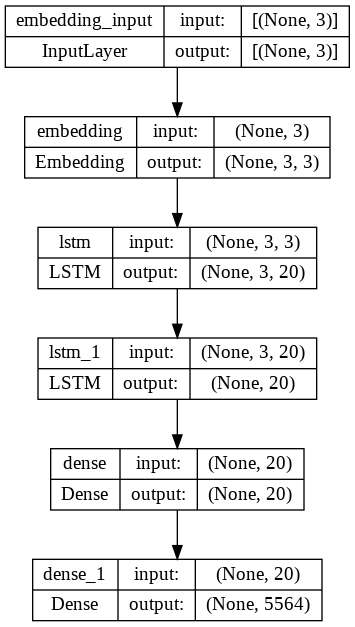

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [ ]:
history = model.fit(training_inputs, training_targets, batch_size=20, 
                    epochs=100, validation_split=0.1, verbose=1).history



Epoch 1/100
626/626 [==============================] - 9s 9ms/step - loss: 7.9492 - accuracy: 0.0405 - val_loss: 8.2295 - val_accuracy: 0.0683
Epoch 2/100
626/626 [==============================] - 5s 8ms/step - loss: 7.4475 - accuracy: 0.0409 - val_loss: 8.5135 - val_accuracy: 0.0683
Epoch 3/100
626/626 [==============================] - 5s 7ms/step - loss: 7.3267 - accuracy: 0.0409 - val_loss: 8.6780 - val_accuracy: 0.0683
Epoch 4/100
334/626 [===============>..............] - ETA: 2s - loss: 7.1381 - accuracy: 0.0389

KeyboardInterrupt: ignored

In [ ]:
model.save('lstm4.h5')


In [ ]:
import tensorflow as tf
# from keras.models import load_model

lstm_model = tf.keras.models.load_model('/content/drive/MyDrive/Emerging/lstm4.h5')
gru_model = tf.keras.models.load_model('/content/drive/MyDrive/Emerging/lstm3.h5')


lstm_model.summary()
gru_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 3, 3)              16692     
                                                                 
 lstm_10 (LSTM)              (None, 3, 20)             1920      
                                                                 
 lstm_11 (LSTM)              (None, 20)                3280      
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 5564)              116844    
                                                                 
Total params: 139,156
Trainable params: 139,156
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
____________________________

In [ ]:
loss, acc = lstm_model.evaluate(training_inputs, training_targets, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

Test loss: 4.2000
Test accuracy: 0.5712


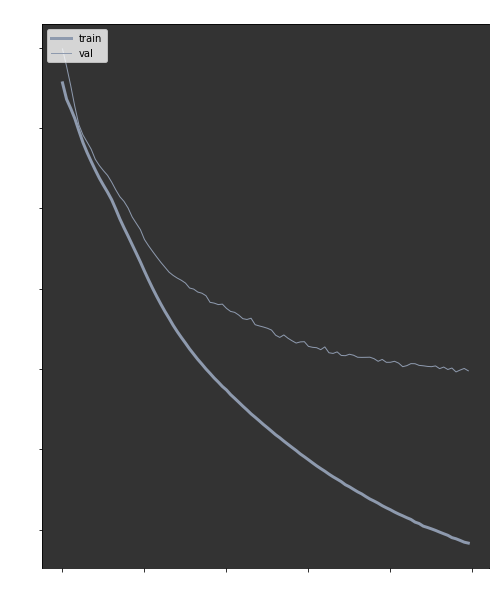

In [ ]:
import matplotlib.pyplot as plt

# print(history.keys())
plt.figure(figsize=(8,10))
ax = plt.axes()
ax.set_facecolor('#333333')
plt.plot(history['loss'], linewidth=3, color='#8e9aae')
plt.plot(history['val_loss'], linewidth=1, color='#8e9aae')
plt.title('Model Loss', fontsize='15' , color='white')
plt.ylabel('loss', fontsize='15', color='white')
plt.yticks(fontsize='14', color='white')
plt.xlabel('epoch', fontsize='15', color='white')
plt.xticks(fontsize='14', color='white')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

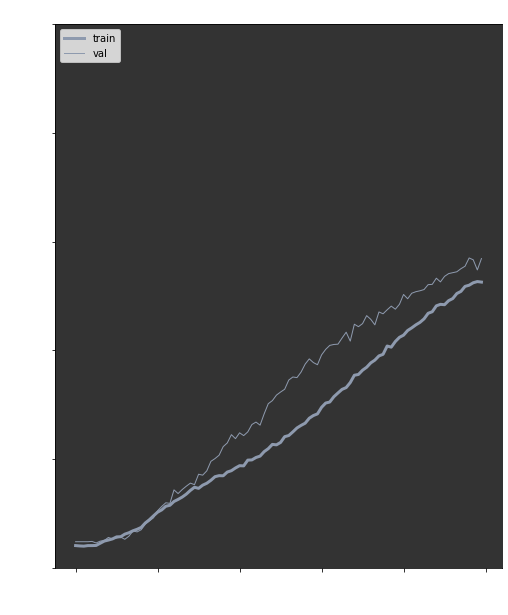

In [ ]:
plt.figure(figsize=(8,10))
ax = plt.axes()
ax.set_facecolor('#333333')
plt.plot(history['accuracy'], linewidth=3, color='#8e9aae')
plt.plot(history['val_accuracy'], linewidth=1, color='#8e9aae')
plt.title('Model Accuracy', fontsize='15' , color='white')
plt.ylabel('accuracy', fontsize='15', color='white')
plt.yticks(fontsize='14', color='white')
plt.xlabel('epoch', fontsize='15', color='white')
plt.xticks(fontsize='14', color='white')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0,1)
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU, Embedding

# define model
model1 = Sequential()

# creates low-dimensional representations of words to learn phrase context
model1.add(Embedding(input_dim=vocab_size,       
                     output_dim=sequence_len,    
                     input_length=sequence_len)) 

model1.add(GRU(20, 
               return_sequences=True)) # prevents next layer being random
model1.add(GRU(20))

# fully connected layer
model1.add(Dense(20))

# fully connected layer
model1.add(Dense(vocab_size, activation='softmax'))

# compile network
model1.compile(loss='categorical_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])

print(model1.summary())


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 3, 3)              16692     
                                                                 
 gru_4 (GRU)                 (None, 3, 20)             1500      
                                                                 
 gru_5 (GRU)                 (None, 20)                2520      
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 5564)              116844    
                                                                 
Total params: 137,976
Trainable params: 137,976
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
plot_model(model1, show_shapes=True)

In [ ]:
history1 = model1.fit(training_inputs, training_targets, batch_size=20, epochs=200, validation_split=0.1, verbose=1).history


Epoch 1/200
626/626 [==============================] - 8s 9ms/step - loss: 7.9417 - accuracy: 0.0393 - val_loss: 8.2380 - val_accuracy: 0.0683
Epoch 2/200
626/626 [==============================] - 5s 7ms/step - loss: 7.4255 - accuracy: 0.0409 - val_loss: 8.4582 - val_accuracy: 0.0683
Epoch 3/200
626/626 [==============================] - 5s 7ms/step - loss: 7.2184 - accuracy: 0.0409 - val_loss: 8.7053 - val_accuracy: 0.0683
Epoch 4/200
626/626 [==============================] - 5s 7ms/step - loss: 7.0230 - accuracy: 0.0413 - val_loss: 8.8807 - val_accuracy: 0.0676
Epoch 5/200
392/626 [=================>............] - ETA: 1s - loss: 6.8390 - accuracy: 0.0460

KeyboardInterrupt: ignored

In [ ]:
# model1.save('gru3.h5')

In [ ]:
loss, acc = model1.evaluate(training_inputs, training_targets, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

Test loss: 2.8607
Test accuracy: 0.8664


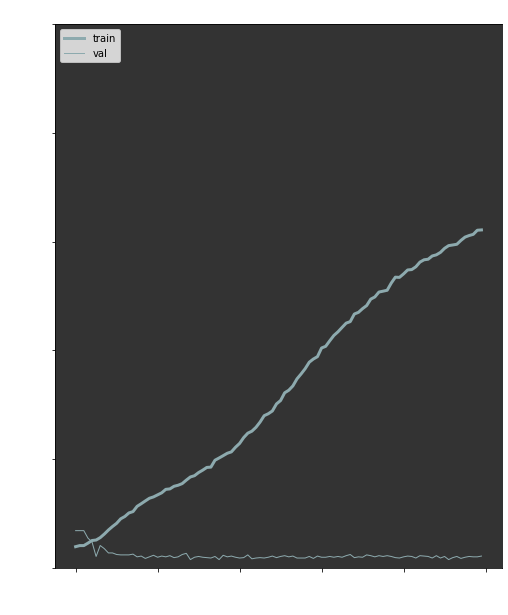

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,10))
ax = plt.axes()
ax.set_facecolor('#333333')
plt.plot(history1['accuracy'], linewidth=3, color='#8daaae')
plt.plot(history1['val_accuracy'], linewidth=1, color='#8daaae')
plt.title('Model Accuracy', fontsize='15' , color='white')
plt.ylabel('accuracy', fontsize='15', color='white')
plt.yticks(fontsize='14', color='white')
plt.xlabel('epoch', fontsize='15', color='white')
plt.xticks(fontsize='14', color='white')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0,1)
plt.show()

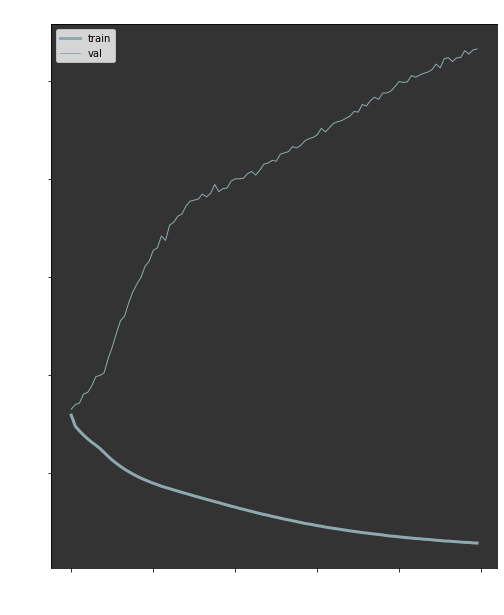

In [ ]:
plt.figure(figsize=(8,10))
ax = plt.axes()
ax.set_facecolor('#333333')
plt.plot(history1['loss'], linewidth=3, color='#8daaae')
plt.plot(history1['val_loss'], linewidth=1, color='#8daaae')
plt.title('Model Loss', fontsize='15' , color='white')
plt.ylabel('loss', fontsize='15', color='white')
plt.yticks(fontsize='14', color='white')
plt.xlabel('epoch', fontsize='15', color='white')
plt.xticks(fontsize='14', color='white')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model3.save('bilstm.h5')

In [ ]:
loss, acc = model1.evaluate(training_inputs, training_targets, verbose=0)

print('Test loss: {:.4f}'.format(loss))
print('Test accuracy: {:.4f}'.format(acc))

Test loss: 3.7272
Test accuracy: 0.6265


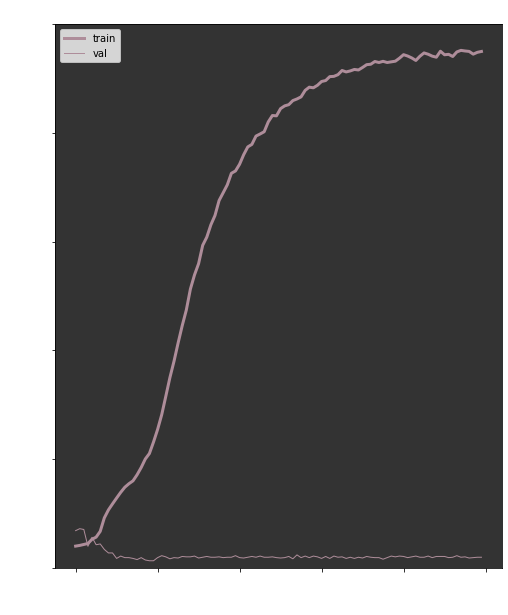

In [ ]:
# plt.figure(figsize=(8,10))
# ax = plt.axes()
# ax.set_facecolor('#333333')
# plt.plot(history3['accuracy'], linewidth=3, color='#ae8d9a')
# plt.plot(history3['val_accuracy'], linewidth=1, color='#ae8d9a')
# plt.title('Model Accuracy', fontsize='15' , color='white')
# plt.ylabel('accuracy', fontsize='15', color='white')
# plt.yticks(fontsize='14', color='white')
# plt.xlabel('epoch', fontsize='15', color='white')
# plt.xticks(fontsize='14', color='white')
# plt.legend(['train', 'val'], loc='upper left')
# plt.ylim(0,1)
# plt.show()

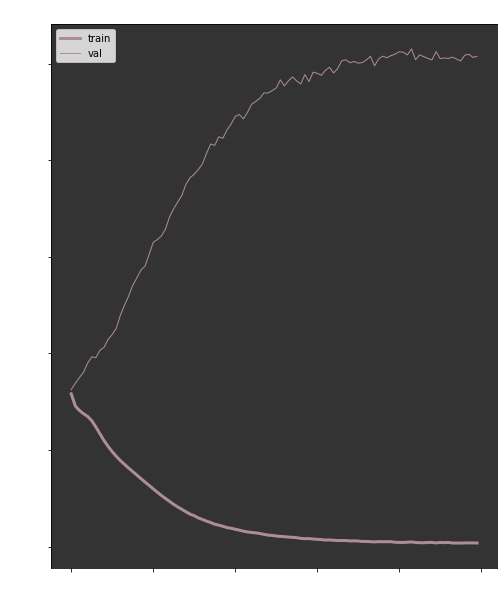

In [ ]:
# plt.figure(figsize=(8,10))
# ax = plt.axes()
# ax.set_facecolor('#333333')
# plt.plot(history3['loss'], linewidth=3, color='#ae8d9a')
# plt.plot(history3['val_loss'], linewidth=1, color='#ae8d9a')
# plt.title('Model Loss', fontsize='15' , color='white')
# plt.ylabel('loss', fontsize='15', color='white')
# plt.yticks(fontsize='14', color='white')
# plt.xlabel('epoch', fontsize='15', color='white')
# plt.xticks(fontsize='14', color='white')
# plt.legend(['train', 'val'], loc='upper left')
# plt.show()

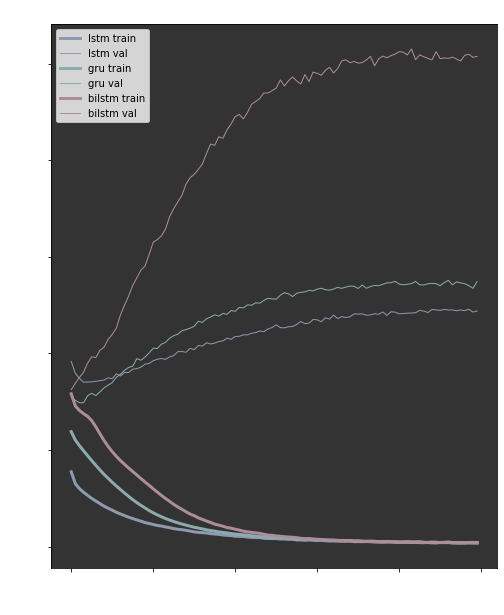

In [ ]:
# plt.figure(figsize=(8,10))
# ax = plt.axes()
# ax.set_facecolor('#333333')
# plt.plot(history['loss'], linewidth=3, color='#8e9aae')
# plt.plot(history['val_loss'], linewidth=1, color='#8e9aae')
# plt.plot(history1['loss'], linewidth=3, color='#8daaae')
# plt.plot(history1['val_loss'], linewidth=1, color='#8daaae')
# plt.plot(history3['loss'], linewidth=3, color='#ae8d9a')
# plt.plot(history3['val_loss'], linewidth=1, color='#ae8d9a')
# plt.title('Model Loss', fontsize='15' , color='white')
# plt.ylabel('loss', fontsize='15', color='white')
# plt.yticks(fontsize='14', color='white')
# plt.xlabel('epoch', fontsize='15', color='white')
# plt.xticks(fontsize='14', color='white')
# plt.legend(['lstm train', 'lstm val', 'gru train', 'gru val', 'bilstm train', 'bilstm val'], loc='upper left')
# plt.show()

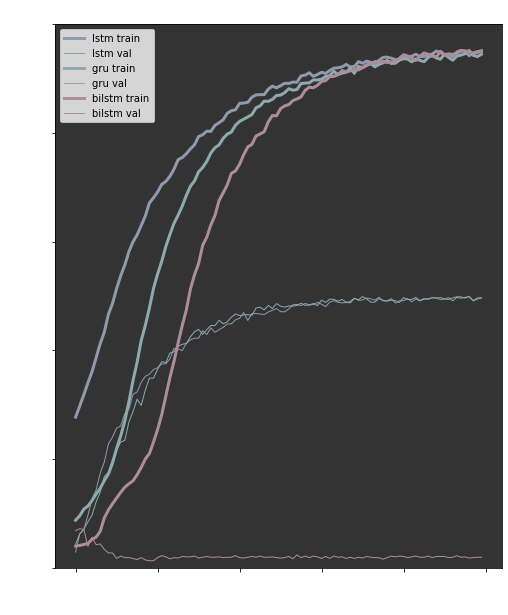

In [ ]:
# plt.figure(figsize=(8,10))
# ax = plt.axes()
# ax.set_facecolor('#333333')
# plt.plot(history['accuracy'], linewidth=3, color='#8e9aae')
# plt.plot(history['val_accuracy'], linewidth=1, color='#8e9aae')
# plt.plot(history1['accuracy'], linewidth=3, color='#8daaae')
# plt.plot(history1['val_accuracy'], linewidth=1, color='#8daaae')
# plt.plot(history3['accuracy'], linewidth=3, color='#ae8d9a')
# plt.plot(history3['val_accuracy'], linewidth=1, color='#ae8d9a')
# plt.title('Model Accuracy', fontsize='15' , color='white')
# plt.ylabel('accuracy', fontsize='15', color='white')
# plt.yticks(fontsize='14', color='white')
# plt.xlabel('epoch', fontsize='15', color='white')
# plt.xticks(fontsize='14', color='white')
# plt.legend(['lstm train', 'lstm val', 'gru train', 'gru val', 'bilstm train', 'bilstm val'], loc='upper left')
# plt.ylim(0,1)
# plt.show()

In [ ]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import string

from keras.preprocessing.text import Tokenizer

import tensorflow as tf
from tensorflow.keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import Dense, LSTM, GRU, SimpleRNN, Embedding

import matplotlib.pyplot as plt

In [ ]:
# input_data = np.array([[1 ]])
# pred = model.predict(input_data)
# print(input_data.shape)
# pred

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

def bag_of_words(arr):
    # creates dictionary and maps every unique word to a unique number
    vectorizer.fit(arr)

    # transforms dictionary features into a 2d feature matrix
    matrix = vectorizer.transform(arr).toarray()

    return matrix


clas_matrix = bag_of_words(classify)



# vocabulary of dictionary with key pair values of word and token id
word_index = vectorizer.vocabulary_



print()
print(vectorizer.vocabulary_)
# number of unique words
print('Unique words:', len(word_index) + 1)
print()




print(clas_matrix) #.toarray())
print(clas_matrix.shape)
print()


{'page': 3485, 'and': 196, 'brin': 608, 'used': 4996, 'the': 4764, 'formers': 1817, 'basic': 418, 'html': 2237, 'programming': 3799, 'skills': 4424, 'to': 4808, 'set': 4349, 'up': 4983, 'simple': 4399, 'search': 4296, 'for': 1807, 'users': 5002, 'as': 292, 'they': 4775, 'did': 1271, 'not': 3290, 'have': 2132, 'web': 5248, 'developer': 1251, 'create': 1079, 'anything': 226, 'visually': 5154, 'elaborate': 1503, 'also': 157, 'began': 455, 'using': 5005, 'any': 225, 'computer': 958, 'part': 3525, 'could': 1060, 'find': 1763, 'assemble': 300, 'necessary': 3207, 'computing': 960, 'power': 3718, 'handle': 2115, 'searches': 4297, 'by': 646, 'multiple': 3128, 'their': 4766, 'engine': 1550, 'grew': 2037, 'in': 2304, 'popularity': 3694, 'among': 176, 'stanford': 4544, 'it': 2420, 'required': 4066, 'additional': 64, 'servers': 4341, 'process': 3775, 'queries': 3902, 'august': 337, 'initial': 2347, 'version': 5091, 'of': 3343, 'google': 2010, 'still': 4572, 'on': 3376, 'university': 4977, 'website

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

def label_encode(arr):
    # maps each language to a number
    encoder.fit(arr)

    # transforms numbers to normalised encoding
    encoded_languages = encoder.transform(arr)

    return encoded_languages


encoded_languages = label_encode(lang)





print(encoded_languages)
print(encoded_languages.shape)
print()
# print(encoder.classes_)
print()
# print(encoder.inverse_transform(encoded_languages))
for i in range(0, len(encoded_languages) - 1):
    print('{} is {}'.format(i, encoder.inverse_transform([i])))



print(list(encoder.inverse_transform(encoded_languages)))
 # finding the language corresponding the the predicted value

# print(lang[0], "- Detected",) # printing the language

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]
(225,)


0 is ['Dutch']
1 is ['English']
2 is ['French']


ValueError: ignored

In [ ]:
clas_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
clas_matrix.shape

(225, 5474)

In [ ]:
encoded_languages

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [ ]:
encoded_languages.shape

(225,)

In [ ]:
from sklearn.model_selection import train_test_split

# splitting data into 80/20 
x_train, x_test, y_train, y_test = train_test_split(clas_matrix, 
                                                    encoded_languages, 
                                                    test_size=0.2)


In [ ]:
print('x_train')
print(x_train)
print(x_train.shape)

print('\nx_test')
print(x_test)
print(x_test.shape)

print('\ny_train')
print(y_train)  
print(y_train.shape)

print('\ny_test')
print(y_test)
print(x_test.shape)

x_train
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(180, 5474)

x_test
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(45, 5474)

y_train
[2 2 2 0 2 2 0 0 2 2 1 2 2 2 1 2 0 0 1 1 1 0 2 0 1 0 1 1 0 2 2 2 0 1 0 1 2
 0 2 1 0 1 0 2 0 0 2 2 1 2 0 0 0 0 0 2 0 1 1 1 2 2 0 2 1 0 2 0 2 0 1 1 2 0
 1 1 2 2 2 0 1 1 2 2 1 1 0 1 1 1 0 2 1 2 1 2 1 2 1 2 0 0 0 2 1 0 0 2 1 0 1
 2 0 0 1 1 2 1 1 0 0 2 2 2 1 0 1 2 1 1 0 1 0 1 2 2 0 0 0 0 1 0 1 1 0 1 0 2
 0 0 2 2 1 1 0 0 1 1 1 2 1 1 0 1 0 2 0 0 0 2 0 1 0 2 0 1 0 2 2 1]
(180,)

y_test
[1 0 2 1 2 2 0 2 0 1 1 1 0 0 2 1 1 1 1 2 2 1 1 0 2 0 2 1 1 2 0 2 0 0 0 1 2
 2 2 2 2 2 0 2 1]
(45, 5474)


In [ ]:
from sklearn.naive_bayes import MultinomialNB  

model = MultinomialNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print('Precision: %.3f' % precision_score(y_test, y_pred, average='micro'))

print('Recall: %.3f' % recall_score(y_test, y_pred, average='micro'))



Precision: 1.000
Recall: 1.000


In [ ]:
def user_input():
    user = input("Enter phrase: ").strip().lower()
    return user

def bow(phrase):
    # turn inputted phrase to array format to 2d feature matrix (bag of words)
    user_matrix = vectorizer.transform([phrase])
    user_mat = user_matrix.toarray()
    return user_mat

def predict_language(arr):
    # predict phrase langauge - returns label encoded number
    prediction = model.predict(arr)
    # get the language based on the predicted number
    prediction = encoder.inverse_transform(prediction) 
    return prediction[0]

predict_language(bow(user_input()))




# print('Detected -', predict_language)


# print the detected language
# print(prediction[0], "- Detected",) 


Enter phrase: Demain elle as dit "My name is Dylan"


'English'

In [ ]:
import tensorflow as tf
# from keras.models import load_model

lstm_model_old = tf.keras.models.load_model('/content/drive/MyDrive/Emerging/lstm3.h5')
lstm_model = tf.keras.models.load_model('/content/drive/MyDrive/Emerging/lstm4.h5')
gru_model = tf.keras.models.load_model('/content/drive/MyDrive/Emerging/gru3.h5')


In [ ]:
from keras_preprocessing.sequence import pad_sequences

user_words = []
user = input("Enter phrase: ").strip().lower()
user_words.append(word_tokenize(user))

# transforms words it recognises from the phrase to its number
encoded_text = tokenizer.texts_to_sequences([user])[0]

# if phrase is too short or word is not in dictionary, fills the sequence with 0
pad_encoded = pad_sequences([encoded_text], 
                            maxlen=sequence_len, 
                            truncating='pre')

phrase = {}
for number in encoded_text:

    # gets the words assigned number
    word = tokenizer.index_word[number]

    # adds word with assigned number
    phrase[word] = [number]


print('Phrase to sequence:', phrase)
print('Phrase encoded:', encoded_text)
print('Next Word Sequence:', pad_encoded)
print()


print(phrase.keys())
print()
# predicts the pad encoded sequence and selects top 3 words
for sequence_number in (lstm_model.predict(pad_encoded)[0]).argsort()[-3:][::-1]:

    # gets the sequence number its assigned word
    pred_word = tokenizer.index_word[sequence_number]

    print("Predicted word: {0}".format([sequence_number]), pred_word)

    # print(user, pred_word)

Enter phrase: Today she said "Bonjour, mon nom est Dylan"
Phrase to sequence: {'she': [78], 'said': [270], 'nom': [168], 'est': [32], 'dylan': [2004]}
Phrase encoded: [78, 270, 168, 32, 2004]
Next Word Sequence: [[ 168   32 2004]]

dict_keys(['she', 'said', 'nom', 'est', 'dylan'])

1/1 [==============================] - 5s 5s/step
Predicted word: [4] en
Predicted word: [30] voor
Predicted word: [10] le


y_pred = model.predict(x_test)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

In [ ]:
from wordcloud import WordCloud

words = ''

# language
for l in all:
    # word
    for word in l:

        word = str(word)
        words += ''.join(word)


wordcloud = WordCloud(width=2000, 
                      height=5755, 
                      margin=0, 
                      background_color='#333333',
                      colormap='tab20c').generate(words)

plt.figure(figsize=(17,17))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# plt.figure(figsize=(18, 8), facecolor='#333333')
plt.figure(figsize=(8, 18), facecolor='#333333')

dutch_pie = [dutch_uniq, len(dutch_token)]
plt.subplot(311)
plt.pie(dutch_pie, 
        labels=['Unique', 'Repeated'], 
        colors=['#58404E', '#846075'],
        autopct='%.0f%%',
        wedgeprops={'linewidth': 2, 'edgecolor': '#333333'},
        textprops={'size': 'x-large'})
p=plt.gcf()
plt.title('Dutch Words', fontsize='15', y=0.96)


english_pie = [english_uniq, len(english_token)]
plt.subplot(312)
plt.pie(english_pie, 
        labels=['Unique', 'Repeated'], 
        colors=['#753E42', '#af5d63'], 
        autopct='%.0f%%',
        wedgeprops={'linewidth': 2, 'edgecolor': '#333333'},
        textprops={'size': 'x-large'})
p=plt.gcf()
plt.title('English Words', fontsize='15', y=0.96)


french_pie = [french_uniq, len(french_token)]
plt.subplot(313)
plt.pie(french_pie, 
        labels=['Unique', 'Repeated'], 
        colors=['#A37B40', '#CB9950'],#'#7E7F9A'], 
        autopct='%.0f%%',
        wedgeprops={'linewidth': 2, 'edgecolor': '#333333'},
        textprops={'size': 'x-large'})
p=plt.gcf()
plt.title('French Words', fontsize='15', y=0.96)
plt.show()



In [ ]:
!pwd

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/test text prediction.ipynb

In [ ]:
!pwd

In [ ]:
%%shell
jupyter nbconvert --to html ///content/test-text-prediction.ipynb

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def addlabels(x, y):
    for i in range(len(x)):
        plt.text(i, y[i] + 80, y[i], ha = 'center', color='white', fontsize='15')


total = [dutch_total, english_total, french_total]
langs = ('Dutch', 'English', 'French')

plt.figure(figsize=(7, 10))
ax = plt.axes()
plt.bar(langs, total, color=[ '#846075', '#AF5D63', '#F4B860'])

plt.title('Number of words for each Language', color='black', fontsize='15')
plt.xlabel('Language', color='black', fontsize='15')
plt.xticks(langs, color='black', fontsize='15')
ax.set_facecolor('#333333')
plt.ylabel('Number of words', color='black', fontsize='15')
plt.yticks(color='black', fontsize='15')
plt.ylim(1000, 6000)
addlabels(langs, total)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# def addlabels(x, y):
#     for i in range(len(y)):
#         plt.text(i, x[i] , x[i], color='white', fontsize='15')


total = [dutch_total, english_total, french_total]
langs = ('Dutch', 'English', 'French')


plt.figure(figsize=(13, 5))
ax = plt.axes()
plt.barh(langs, total, color=[ '#846075', '#AF5D63', '#F4B860'])#, '#ED474A'])

plt.title('Number of words for each Language', color='white', fontsize='15')
plt.xlabel('Total', color='white', fontsize='15')
plt.xticks( color='white', fontsize='14')
ax.set_facecolor('#333333')
# plt.ylabel('Languages', color='black', fontsize='15')
plt.yticks(color='white', fontsize='14')
plt.xlim(1000, 6000)
# addlabels(total, langs)
plt.show()

In [ ]:
# model = Sequential()
# model.add(GRU(64, input_shape=(look_back, len(vectorizer.vocabulary_) + 1)))
# model.add(Dropout(0.2))
# model.add(Dense(len(vectorizer.vocabulary_) + 1))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# model = Sequential()
# # model.add(Embedding(vocab_size, 10, input_length=look_back))
# model.add(GRU(64, input_shape=(vocab_size, look_back)))
# model.add(Dropout(0.2))
# # model.add(GRU(64))
# # model.add(Dropout(0.2))
# model.add(Dense(vocab_size))
# model.add(Activation('softmax'))
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [ ]:
# history = model.fit(vectors, lang, batch_size=16, epochs=20, shuffle=True).history

In [ ]:
# plt.plot(history['acc'])
# plt.plot(history['val_acc'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')